In [2]:
import matplotlib.image as img
import cv2
import matplotlib.pyplot as plt
import os
import numpy
import numpy.linalg
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from skimage import data, exposure, img_as_float
from skimage import exposure

def fetch_images_yale():
    imagesList = os.listdir("/Users/lakshya/Desktop/Lakshya/Artificial Intelligence/AI Project/yalefaces/")
    imagesList = imagesList[1:]
    imagesList = numpy.array(imagesList)
    numpy.random.shuffle(imagesList)
    print(imagesList.__getitem__(0))
    return imagesList
    
    
def face_detect_haar(image, images_name):

    haar_face_cascade = cv2.CascadeClassifier('/Users/lakshya/opencv/data/haarcascades/haarcascade_frontalface_alt.xml')
    face_identified_img = image.copy()
    faces = haar_face_cascade.detectMultiScale(face_identified_img, scaleFactor=1.2, minNeighbors=5);  
    if len(faces) == 0:
        print(image_name)
        return []
    else:
        for (x, y, w, h) in faces:     
            cv2.rectangle(face_identified_img, (x, y-25), (x+w, y+h+20), (0, 255, 0), 2)
            
        face_array = numpy.array(image)
        face_array = face_array[y:y+h+21,x:x+w+1]
        return face_array

#     print(x,y-15,w,h+20)

#     plt.imshow(face_identified_img,cmap = 'gray')
    

def face_detect_lbp(image,image_name):
    lbp_face_cascade = cv2.CascadeClassifier('/Users/lakshya/opencv/data/lbpcascades/lbpcascade_frontalface.xml')
    face_identified_img = image.copy()
    faces = lbp_face_cascade.detectMultiScale(face_identified_img, scaleFactor=1.2, minNeighbors=5)  
    if len(faces) == 0:
        print(image_name)
        print(len(faces))
        return []
    else:

        for (x, y, w, h) in faces:     
            cv2.rectangle(face_identified_img, (x, y-25), (x+w, y+h+20), (0, 255, 0), 2)
    
        face_array = numpy.array(image)
        face_array = face_array[y:y+h+21,x:x+w+1]
        plt.imshow(face_array,cmap = 'gray')
        return face_array

#     print(x,y,w,h+20)

#     plt.imshow(face_identified_img,cmap = 'gray')



# YaleFaces Dataset

In [290]:
imagesList = fetch_images()

subject15.surprised


subject14.rightlight
subject11.happy
subject10.leftlight
subject14.leftlight
subject11.centerlight
subject05.rightlight
subject04.leftlight
subject04.rightlight
subject11.rightlight
subject01.rightlight
subject12.leftlight
subject08.rightlight
subject05.leftlight
subject06.rightlight
subject15.rightlight
subject11.leftlight
subject03.rightlight
subject12.rightlight


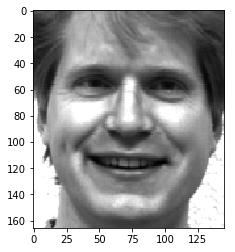

In [319]:
# face detection and fetch face from the image

face_extracted_array = []
names = []
for i in range(imagesList.__len__()):
    image = img.imread("/Users/lakshya/Desktop/Lakshya/Artificial Intelligence/AI Project/yalefaces/" + imagesList[i])
    face_array = face_detect_lbp(image,imagesList[i])
    if face_array.__len__() != 0 :
        face_array = cv2.resize(face_array,dsize=(90, 110), interpolation=cv2.INTER_CUBIC).flatten()
        
#         face_extracted_array.append(face_array/numpy.linalg.norm(face_array))          # only normalization

        face_extracted_array.append(exposure.equalize_hist(face_array/numpy.linalg.norm(face_array)))  #normalization -> histogram equalization
    
#         face_extracted_array.append(exposure.equalize_hist(face_array))               # only histogram equalization

        names.append(imagesList[i].split(".")[0])

face_extracted_array = numpy.array(face_extracted_array)
names = numpy.array(names)

In [320]:
test_images = face_extracted_array[int(0.7 * face_extracted_array.shape[0]):]
train_images = face_extracted_array[ : int(0.7 * face_extracted_array.shape[0])]

test_names = names[int(0.7 * names.shape[0]):]

# for i in range(test_y.size):
#     print(test_y[i])

train_names = names[ : int(0.7 * names.shape[0])]
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }

clf = GridSearchCV(SVC(), param_grid)

In [321]:
# prediction without pca

clf.fit(train_images,train_names)
predicted_names = clf.predict(test_images)
print("score : %d",accuracy_score(test_names, predicted_names))

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score : %d 0.9333333333333333


In [335]:
# prediction using pca

pca_components = 101
pca = PCA(svd_solver='randomized',n_components=pca_components, whiten=False).fit(train_images)
train_images_pca = pca.transform(train_images)
test_images_pca = pca.transform(test_images)
clf = clf.fit(train_images_pca, train_names)

predicted_names = clf.predict(test_images_pca)
print(accuracy_score(test_names, predicted_names))


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9333333333333333


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


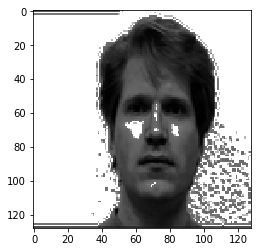

In [7]:
image = img.imread("/Users/lakshya/Desktop/Lakshya/Artificial Intelligence/AI Project/ResizedYalefaces/subject01.normal.png")
imge = exposure.equalize_hist(image)
plt.imshow(imge, cmap='gray')
# face_array = face_detect_lbp(image,"sub")

In [240]:
# without face detection

x=[]
y=[]
for i in range(imagesList.__len__()):
    t = exposure.equalize_hist(img.imread("/Users/lakshya/Desktop/Lakshya/Artificial Intelligence/AI Project/yalefaces/" + imagesList[i])).flatten()
    x.append(t/numpy.linalg.norm(t))
    y.append(imagesList[i].split(".")[0])
    
# for i in range(x.__len__()):
#     print(x.__getitem__(i))
    

x = numpy.array(x)
y = numpy.array(y)


# print(x.shape[0])
# for i in range(x.shape[0]):
#     print(x[i], " ", y[i])

test_x = x[int(0.7 * x.shape[0]):]
train_x = x[ : int(0.7 * x.shape[0])]

test_y = y[int(0.7 * y.shape[0]):]

# for i in range(test_y.size):
#     print(test_y[i])

train_y = y[ : int(0.7 * y.shape[0])]
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }

clf = GridSearchCV(SVC(), param_grid)

clf.fit(train_x,train_y)
predicted_y = clf.predict(test_x)

# for i in range(test_y.shape[0]):
#     print(predicted_y[i]," ",test_y[i],"\n")

print("score : %d",accuracy_score(test_y, predicted_y))
    

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score : %d 0.9
